In [21]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

In [3]:
submissions_original = pd.read_csv('../data/submissions_no_sanitize.csv').drop(['Unnamed: 0', 'selftext'], axis=1)

In [64]:
submissions_original.head()

,subreddit,title,all,all_no_rem_or_del
0,LiverpoolFC,Looked up Luis Díaz's stats and Wiki..... Look...,Looked up Luis Díaz's stats and Wiki..... Look...,Looked up Luis Díaz's stats and Wiki..... Look...
1,LiverpoolFC,Why No Support for Our Boys in Afcon? :(,[removed]Why No Support for Our Boys in Afcon? :(,Why No Support for Our Boys in Afcon? :(
2,LiverpoolFC,Most valuable left wingers in the world. Opini...,Most valuable left wingers in the world. Opini...,Most valuable left wingers in the world. Opini...
3,LiverpoolFC,We have some really good dancers on this team.,We have some really good dancers on this team.,We have some really good dancers on this team.
4,LiverpoolFC,[Fabrizio Romano] Liverpool and Porto sources ...,[Fabrizio Romano] Liverpool and Porto sources ...,[Fabrizio Romano] Liverpool and Porto sources ...


In [65]:
submissions_original.isnull().sum()

subreddit            0
title                4
all                  0
all_no_rem_or_del    0
dtype: int64

In [66]:
submissions_original.shape

(57908, 4)

In [67]:
submissions_original.dropna()

,subreddit,title,all,all_no_rem_or_del
0,LiverpoolFC,Looked up Luis Díaz's stats and Wiki..... Look...,Looked up Luis Díaz's stats and Wiki..... Look...,Looked up Luis Díaz's stats and Wiki..... Look...
1,LiverpoolFC,Why No Support for Our Boys in Afcon? :(,[removed]Why No Support for Our Boys in Afcon? :(,Why No Support for Our Boys in Afcon? :(
2,LiverpoolFC,Most valuable left wingers in the world. Opini...,Most valuable left wingers in the world. Opini...,Most valuable left wingers in the world. Opini...
3,LiverpoolFC,We have some really good dancers on this team.,We have some really good dancers on this team.,We have some really good dancers on this team.
4,LiverpoolFC,[Fabrizio Romano] Liverpool and Porto sources ...,[Fabrizio Romano] Liverpool and Porto sources ...,[Fabrizio Romano] Liverpool and Porto sources ...
...,...,...,...,...
57903,Everton,Everton Boosted as Inter Reportedly Look to Se...,Everton Boosted as Inter Reportedly Look to Se...,Everton Boosted as Inter Reportedly Look to Se...
57904,Everton,Everton-Chelsea rating results,I have a feeling this is going to illicit a fe...,I have a feeling this is going to illicit a fe...
57905,Everton,I loved the picture from that Guardian article...,I loved the picture from that Guardian article...,I loved the picture from that Guardian article...
57906,Everton,Blues Brothers: Phil Jagielka v Leighton Baines,Blues Brothers: Phil Jagielka v Leighton Baines,Blues Brothers: Phil Jagielka v Leighton Baines


In [4]:
X = submissions_original['all']
y = submissions_original['subreddit']

In [69]:
y.value_counts(normalize=True)

LiverpoolFC    0.500967
Everton        0.499033
Name: subreddit, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    stratify=y,#stratify = y b/c the data = imbalanced
                                                    random_state=42)

In [74]:
pipe_rf = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier(n_jobs=-1))
])

In [78]:
pipe_params_rf = {
    'tvec__max_features' : [10_000, 12_500],
    'tvec__ngram_range' : [(1,3)],
    'tvec__stop_words' : [None, 'english'],
    'rf__n_estimators' : [150, 200, 250, 300]
}

In [79]:
gs_rf = GridSearchCV(pipe_rf, param_grid=pipe_params_rf, cv=3, verbose = 3)

In [80]:
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END rf__n_estimators=150, tvec__max_features=10000, tvec__ngram_range=(1, 3), tvec__stop_words=None; total time= 1.9min
[CV 2/3] END rf__n_estimators=150, tvec__max_features=10000, tvec__ngram_range=(1, 3), tvec__stop_words=None; total time= 1.9min
[CV 3/3] END rf__n_estimators=150, tvec__max_features=10000, tvec__ngram_range=(1, 3), tvec__stop_words=None; total time= 2.0min
[CV 1/3] END rf__n_estimators=150, tvec__max_features=10000, tvec__ngram_range=(1, 3), tvec__stop_words=english; total time= 1.4min
[CV 2/3] END rf__n_estimators=150, tvec__max_features=10000, tvec__ngram_range=(1, 3), tvec__stop_words=english; total time= 1.5min
[CV 3/3] END rf__n_estimators=150, tvec__max_features=10000, tvec__ngram_range=(1, 3), tvec__stop_words=english; total time= 1.3min
[CV 1/3] END rf__n_estimators=150, tvec__max_features=12500, tvec__ngram_range=(1, 3), tvec__stop_words=None; total time= 1.8min
[CV 2/3] END rf__n_estimato

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1))]),
             param_grid={'rf__n_estimators': [150, 200, 250, 300],
                         'tvec__max_features': [10000, 12500],
                         'tvec__ngram_range': [(1, 3)],
                         'tvec__stop_words': [None, 'english']},
             verbose=3)

In [81]:
gs_rf.best_estimator_

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_features=12500, ngram_range=(1, 3),
                                 stop_words='english')),
                ('rf', RandomForestClassifier(n_estimators=300, n_jobs=-1))])

In [86]:
gs_model_rf = gs_rf.best_estimator_

In [87]:
gs_model_rf.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_features=12500, ngram_range=(1, 3),
                                 stop_words='english')),
                ('rf', RandomForestClassifier(n_estimators=300, n_jobs=-1))])

In [12]:
gs_model_rf = gs_rf.best_estimator_

In [13]:
gs_model_rf.score(X_train, y_train)

0.9884945818762682

In [14]:
gs_model_rf.score(X_test, y_test)

0.8749784147815576

In [18]:
def conmat(y_test, preds, classes):

    conmat = confusion_matrix(y_test, preds)
    print(f'Accuracy Score: {accuracy_score(y_test, preds)}')
    return pd.DataFrame(conmat, columns=['Predicted ' +class_ for class_ in classes], \
                index=['Actual '+ class_ for class_ in classes])

preds = gs_rf.best_estimator_.predict(X_test)

conmat(y_test, preds, ['Liverpool', 'Everton'])

Accuracy Score: 0.8749784147815576


,Predicted Liverpool,Predicted Everton
Actual Liverpool,4934,846
Actual Everton,602,5200


In [19]:
# Get predictions
preds = gs_model_rf.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

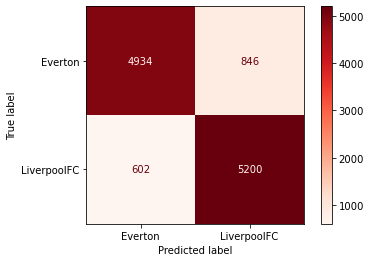

In [22]:
# View confusion matrix in seaborn
plot_confusion_matrix(gs_model_rf, X_test,y_test,cmap='Reds',values_format='d');

In [26]:
#Recall Rate or Sensitivity
#Percentage of true positives gotten correct
Recall = tp/(tp + fn)
print(f'Recall: {round(Recall,2)}')

#Precision
#Poportion of correct that are actually correct
precision = tp / (tp+fp)
print(f'Precision: {round(precision,2)}')

 # Calculate the specificity TRUE NEG RATE
#percentage of true negatives gotten correct
specificity = tn/ (tn+fp)
print(f'Specificity: {round(specificity,2)}')

#the mean of precision and recall.
#mean of proportion that are predicted actually positive correctly and actually negative correctly
f1_score = (2*precision*Recall)/ (precision + Recall)
print(f'F1_Score: {round(f1_score,2)}')

Recall: 0.9
Precision: 0.86
Specificity: 0.85
F1_Score: 0.88
